#### Using a statistical test to tackle one of the claims of our project. Does having a porch affect saleprice? ####

In [29]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
plt.style.use('seaborn')

In [40]:
df = pd.read_csv('../leana_m1', index_col=0)

In [5]:
df.columns

Index(['documentdate', 'saleprice', 'propertytype', 'principaluse',
       'saleinstrument', 'currentuseland', 'historicproperty', 'salereason',
       'propertyclass', 'zipcode', 'streettype', 'stories', 'buildinggrade',
       'squarefeettotalliving', 'squarefeettotalbasement',
       'squarefeetgarageattached', 'squarefeetopenporch',
       'squarefeetenclosedporch', 'squarefeetdeck', 'bedrooms',
       'bathhalfcount', 'bath3qtrcount', 'bathfullcount',
       'fireplacesinglestory', 'fireplacemultiplestory',
       'fireplacefreestanding', 'fireplaceadditional', 'yearbuilt',
       'yearrenovated', 'percentcomplete', 'obsolescence',
       'percentnetcondition', 'condition', 'township', 'propertytype.1',
       'districtname', 'levycode', 'lotsquarefootage', 'watersystem', 'access',
       'topography', 'viewmtranier', 'viewolympics', 'viewcascades',
       'viewterritorial', 'viewseattleskyline', 'viewpugetsound',
       'viewlakewashington', 'viewlakesammamish', 'viewsmalllakeriv

In [41]:
df.describe()

,saleprice,propertytype,principaluse,saleinstrument,salereason,propertyclass,zipcode,stories,buildinggrade,squarefeettotalliving,...,waterfrontfootage,waterfrontbank,waterfrontpoorqualtiy,waterfrontrestrictedaccess,waterfrontaccessrights,lotdepthfactopr,trafficnoise,airportnoise,powerlines,bathtotcount
count,1.817000e+04,18170.000000,18170.0,18170.000000,18170.000000,18170.000000,15809.000000,18170.000000,18170.000000,18170.000000,...,18170.000000,18170.000000,18170.000000,18170.000000,18170.000000,18170.000000,18170.000000,18170.000000,18170.0,18170.000000
mean,7.336265e+05,11.028178,6.0,2.998349,1.001871,7.993286,98065.593902,1.551403,7.611392,2052.463181,...,0.072262,0.971106,0.015080,0.000385,0.004128,0.007650,0.030875,0.198624,0.0,2.157512
std,3.686900e+05,0.308891,0.0,0.040601,0.178351,0.081668,1104.526976,0.558065,1.071731,807.330871,...,0.731802,16.255006,0.163529,0.019625,0.095207,0.123236,1.583976,0.542546,0.0,0.731128
min,5.000000e+03,11.000000,6.0,2.000000,1.000000,7.000000,98.000000,1.000000,1.000000,250.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.500000
25%,4.690000e+05,11.000000,6.0,3.000000,1.000000,8.000000,98032.000000,1.000000,7.000000,1440.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.750000
50%,6.500000e+05,11.000000,6.0,3.000000,1.000000,8.000000,98059.000000,2.000000,7.000000,1930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.250000
75%,8.800000e+05,11.000000,6.0,3.000000,1.000000,8.000000,98118.000000,2.000000,8.000000,2560.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.500000
max,2.498000e+06,18.000000,6.0,3.000000,18.000000,8.000000,98812.000000,4.000000,12.000000,4490.000000,...,9.000000,1610.000000,3.000000,1.000000,3.000000,3.000000,96.000000,3.000000,0.0,6.250000


In [9]:
df_porch = df[(df['squarefeetopenporch'] > 0) | (df['squarefeetenclosedporch'] > 0)].saleprice

In [11]:
len(df_porch)

9403

In [16]:
df_noporch = df[~(df['squarefeetopenporch'] > 0) | (df['squarefeetenclosedporch'] > 0)].saleprice

In [18]:
len(df_noporch)

9553

**Ho: the mean home sale prices of homes with a porch are less than or equal to homes without a porch**

**Ha: the mean home sale prices of homes with a porch are higher than homes without a porch**

performing a two sample onetailed Welch's ttest to check this

setting ***alpha*** at 0.05

In [33]:
test_result = stats.ttest_ind(df_porch, df_noporch, equal_var=False)
test_result

Ttest_indResult(statistic=27.511076479143583, pvalue=3.399103034834849e-163)

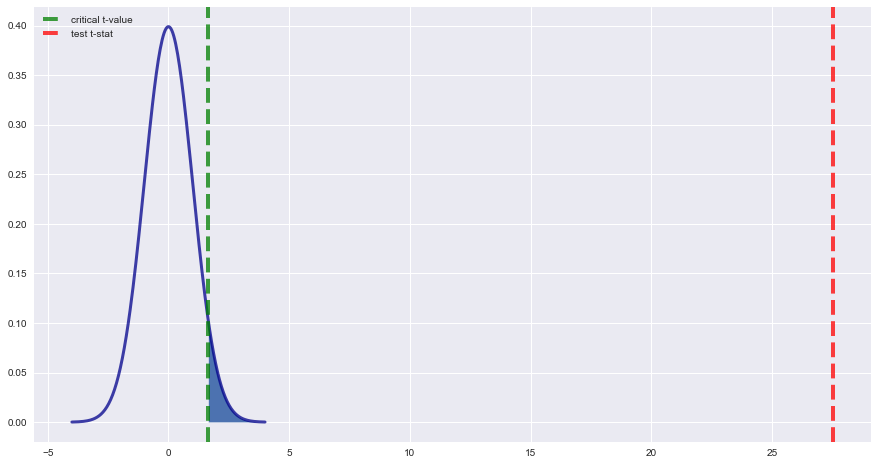

In [30]:
xs = np.linspace(-4, 4, 200)
# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom
ys = stats.t.pdf(xs, len(df_porch)+len(df_noporch)-2, 0, 1)
t_crit = np.round(stats.t.ppf(1 - 0.05, df=len(df_porch)+len(df_noporch)-2),3)

fig = plt.figure(figsize=(15,8))
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xs, ys, linewidth=3, color='darkblue', alpha=.75)


ax.axvline(t_crit,color='green',linestyle='--',lw=4,label='critical t-value', alpha=.75)
ax.axvline(test_result[0],color='red',linestyle='--',lw=4,label='test t-stat', alpha=.75)
ax.legend()
ax.fill_betweenx(ys,xs,t_crit,where= xs > t_crit)
plt.show()

Based on the given evidence, we can reject our null hypothesis. **Having a porch does indeed impact the sale price of a home.** 

Something a new home buyer should keep in mind.